In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
from sklearn.metrics import accuracy_score, f1_score,classification_report

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

In [7]:
from collections import Counter

In [8]:
from nltk.corpus import stopwords

In [9]:
import string

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [14]:
train = pd.read_csv("Train.csv")

In [15]:
test = pd.read_csv("Test.csv")

In [16]:
train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train[(train["Computer Science"] == 1) & (train["Mathematics"] ==1)]

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
8,18709,nowadays data compressors are applied to many ...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
42,11146,due to severe mathematical modeling and calibr...,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
95,2555,sufficient and necessary conditions considerin...,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
105,2434,this paper addresses a problem of output volta...,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
145,18795,"we give the simple, fast algorithm considering...",1,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13881,7041,we consider a problem of convergence to the sa...,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13894,402,unmanned aerial vehicles (uavs) have attracted...,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13900,11515,"inside this paper, we propose the new robustne...",1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13934,8437,"this paper, a second of the two-part series, p...",1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [18]:
train['Mathematics'].value_counts()

0    11173
1     2831
Name: Mathematics, dtype: int64

In [19]:
train['Physics'].value_counts()

0    10148
1     3856
Name: Physics, dtype: int64

In [20]:
train['Statistics'].value_counts()

0    10210
1     3794
Name: Statistics, dtype: int64

In [21]:
train['Computer Science'].value_counts()

0    8120
1    5884
Name: Computer Science, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

In [23]:
train = train.rename(columns={"Computer Science":"computer_science","Analysis of PDEs":"analysis_PDEs","Artificial Intelligence":"artificial_intelligence","Astrophysics of Galaxies":"astrophysics_of_galaxies","Computation and Language":"computation_and_language","Computer Vision and Pattern Recognition":"computer_vision_and_pattern_recognition","Cosmology and Nongalactic Astrophysics":"cosmology_and_nongalactic_astrophysics",
                              "Data Structures and Algorithms":"data_structures_and_algorithms","Differential Geometry":"differential_geometry",
                              "Earth and Planetary Astrophysics":"earth_and_planetary_astrophysics","Fluid Dynamics":"fluid_dynamics","Information Theory":"information_theory",
                              "Instrumentation and Methods for Astrophysics":"instrumentation_and_methods_for_astrophysics","Machine Learning":"machine_learning","Materials Science":"materials_science",
                              "Number Theory":"number_theory","Optimization and Control":"optimization_and_control","Representation Theory":"representation_theory","Social and Information Networks":"social_and_information_networks","Statistics Theory":"statistics_theory",
                              "Strongly Correlated Electrons":"strongly_correlated_electrons","Systems and Control":"systems_and_control"})

In [24]:
train.columns.to_list()

['id',
 'ABSTRACT',
 'computer_science',
 'Mathematics',
 'Physics',
 'Statistics',
 'analysis_PDEs',
 'Applications',
 'artificial_intelligence',
 'astrophysics_of_galaxies',
 'computation_and_language',
 'computer_vision_and_pattern_recognition',
 'cosmology_and_nongalactic_astrophysics',
 'data_structures_and_algorithms',
 'differential_geometry',
 'earth_and_planetary_astrophysics',
 'fluid_dynamics',
 'information_theory',
 'instrumentation_and_methods_for_astrophysics',
 'machine_learning',
 'materials_science',
 'Methodology',
 'number_theory',
 'optimization_and_control',
 'representation_theory',
 'Robotics',
 'social_and_information_networks',
 'statistics_theory',
 'strongly_correlated_electrons',
 'Superconductivity',
 'systems_and_control']

# EDA

In [25]:
train["ABSTRACT"][0]

'a ever-growing datasets inside observational astronomy have challenged scientists inside many aspects, including an efficient and interactive data exploration and visualization. many tools have been developed to confront this challenge. however, they usually focus on displaying a actual images or focus on visualizing patterns within catalogs inside the predefined way. inside this paper we introduce vizic, the python visualization library that builds a connection between images and catalogs through an interactive map of a sky region. vizic visualizes catalog data over the custom background canvas with the help of a shape, size and orientation of each object inside a catalog. a displayed objects inside a map are highly interactive and customizable comparing to those inside a images. these objects should be filtered by or colored by their properties, such as redshift and magnitude. they also should be sub-selected with the help of the lasso-like tool considering further analysis with the

In [26]:
ID_COL = 'id'

TARGET_COLS = ['analysis_PDEs', 'Applications',
               'artificial_intelligence', 'astrophysics_of_galaxies',
               'computation_and_language', 'computer_vision_and_pattern_recognition',
               'cosmology_and_nongalactic_astrophysics',
               'data_structures_and_algorithms', 'differential_geometry',
               'earth_and_planetary_astrophysics', 'fluid_dynamics',
               'information_theory', 'instrumentation_and_methods_for_astrophysics',
               'machine_learning', 'materials_science', 'Methodology', 'number_theory',
               'optimization_and_control', 'representation_theory', 'Robotics',
               'social_and_information_networks', 'statistics_theory',
               'strongly_correlated_electrons', 'Superconductivity',
               'systems_and_control']

TOPIC_COLS = ['computer_science', 'Mathematics', 'Physics', 'Statistics']

In [27]:
SUBJECTS = TARGET_COLS + TOPIC_COLS

In [28]:
SUBJECTS

['analysis_PDEs',
 'Applications',
 'artificial_intelligence',
 'astrophysics_of_galaxies',
 'computation_and_language',
 'computer_vision_and_pattern_recognition',
 'cosmology_and_nongalactic_astrophysics',
 'data_structures_and_algorithms',
 'differential_geometry',
 'earth_and_planetary_astrophysics',
 'fluid_dynamics',
 'information_theory',
 'instrumentation_and_methods_for_astrophysics',
 'machine_learning',
 'materials_science',
 'Methodology',
 'number_theory',
 'optimization_and_control',
 'representation_theory',
 'Robotics',
 'social_and_information_networks',
 'statistics_theory',
 'strongly_correlated_electrons',
 'Superconductivity',
 'systems_and_control',
 'computer_science',
 'Mathematics',
 'Physics',
 'Statistics']

In [29]:
y = train[TOPIC_COLS]

In [30]:
train.head()

,id,ABSTRACT,computer_science,Mathematics,Physics,Statistics,analysis_PDEs,Applications,artificial_intelligence,astrophysics_of_galaxies,...,Methodology,number_theory,optimization_and_control,representation_theory,Robotics,social_and_information_networks,statistics_theory,strongly_correlated_electrons,Superconductivity,systems_and_control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = train.drop(SUBJECTS,axis = 1)

In [32]:
X.head()

,id,ABSTRACT
0,1824,a ever-growing datasets inside observational a...
1,3094,we propose the framework considering optimal $...
2,8463,nanostructures with open shell transition meta...
3,2082,stars are self-gravitating fluids inside which...
4,8687,deep neural perception and control networks ar...


In [33]:
100 * (train[TARGET_COLS].sum()/(train.shape[0])).sort_values(ascending=False)

machine_learning                                27.313625
artificial_intelligence                          9.825764
Robotics                                         6.812339
computer_vision_and_pattern_recognition          6.705227
strongly_correlated_electrons                    6.376750
materials_science                                5.534133
computation_and_language                         4.605827
cosmology_and_nongalactic_astrophysics           4.520137
optimization_and_control                         4.434447
social_and_information_networks                  4.420166
analysis_PDEs                                    4.334476
Applications                                     4.227364
astrophysics_of_galaxies                         4.098829
Methodology                                      4.098829
systems_and_control                              4.041702
differential_geometry                            3.963153
Superconductivity                                3.870323
statistics_the

In [34]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 42)

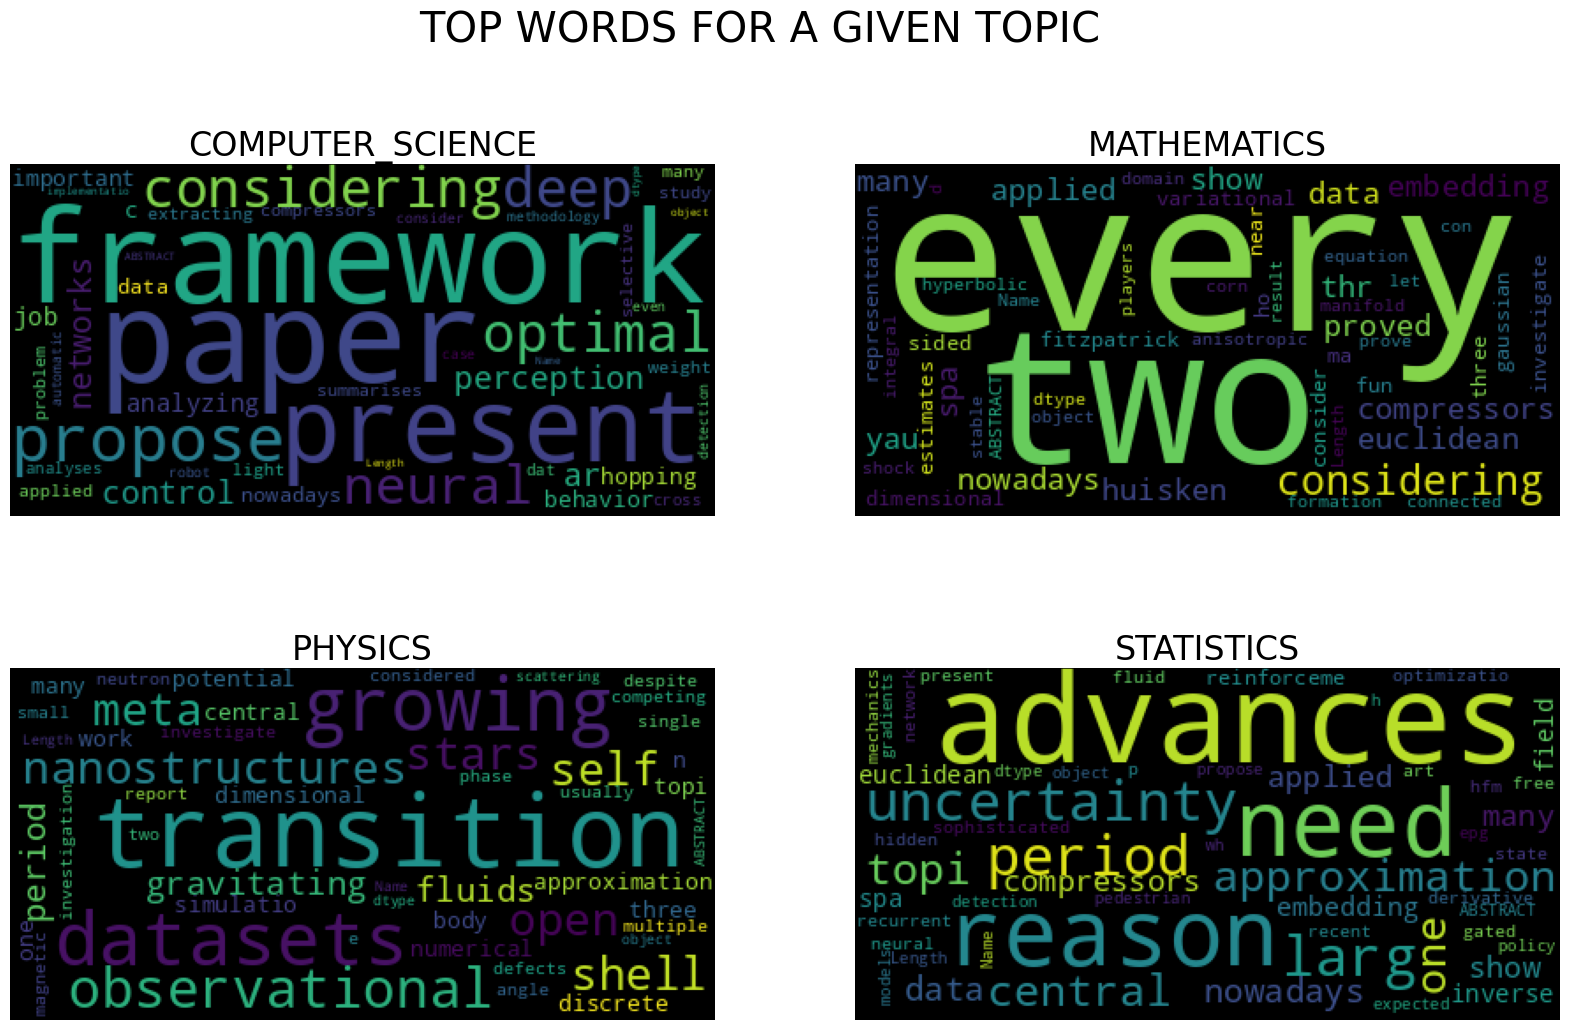

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(TOPIC_COLS):
  sub_topic = train[train[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

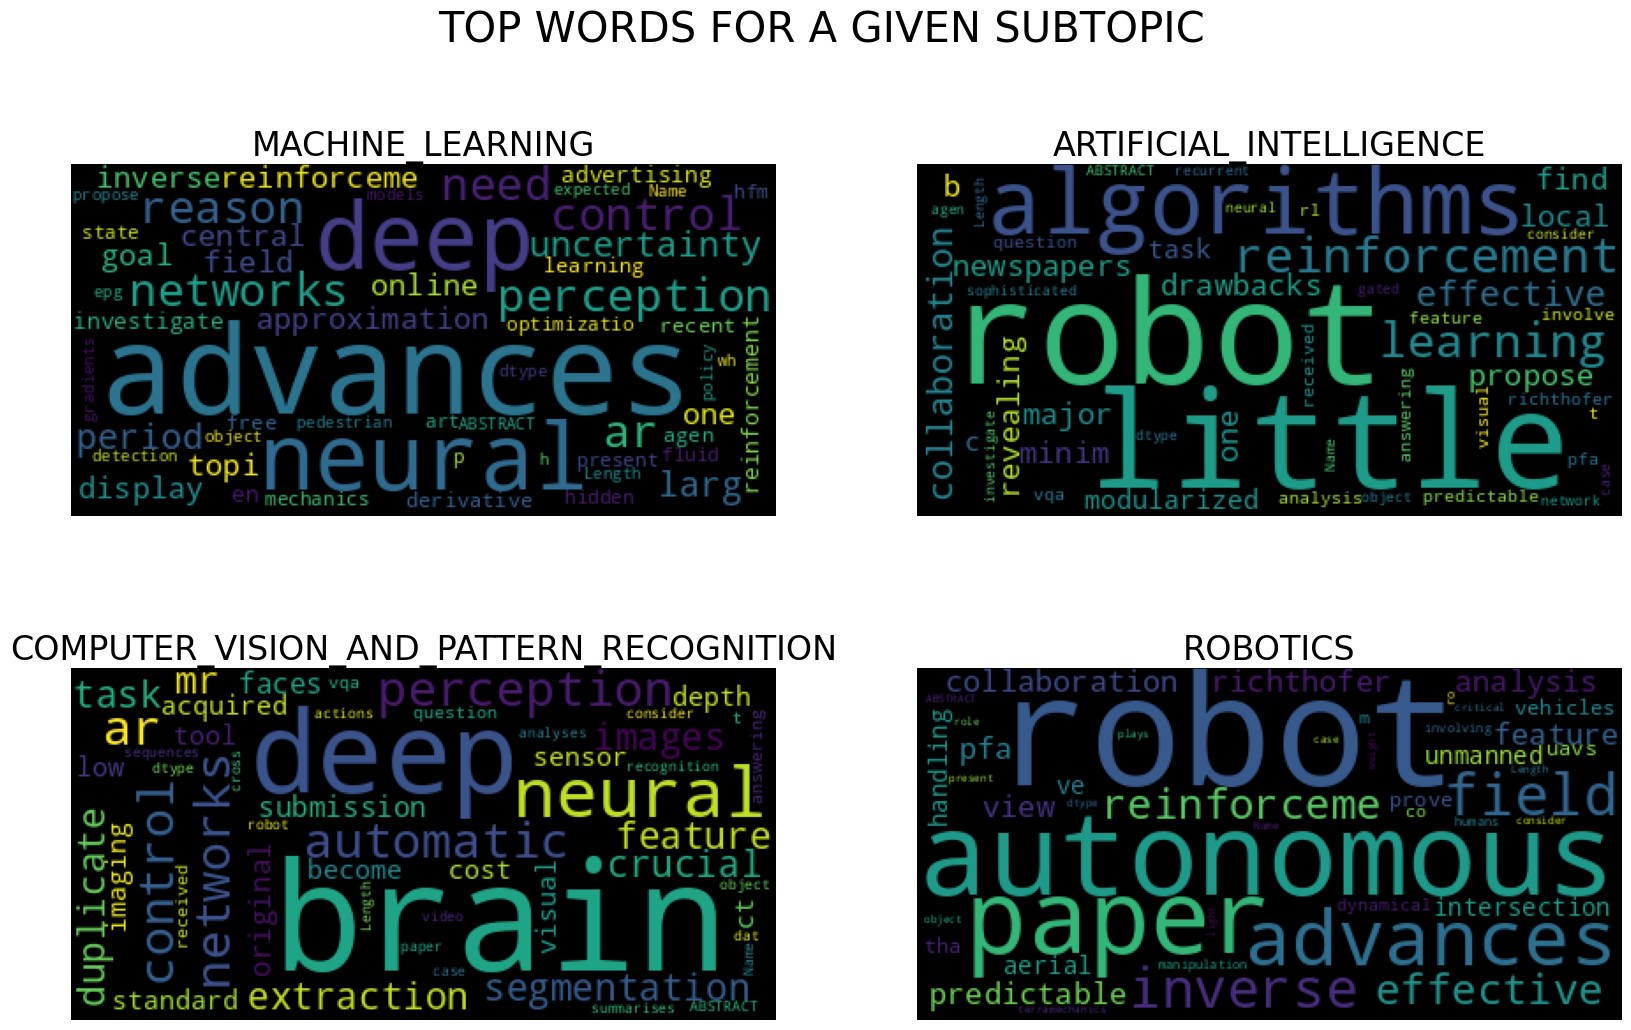

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['machine_learning', 'artificial_intelligence', 'computer_vision_and_pattern_recognition', 'Robotics']):
  sub_topic = train[train[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN SUBTOPIC', fontsize=30)

# Baseline

In [37]:
vec = CountVectorizer(max_features=10000)
combined = list(train['ABSTRACT']) + list(test['ABSTRACT'])
vec.fit(combined)

CountVectorizer(max_features=10000)

In [38]:
trn, val = train_test_split(train, test_size=0.2, random_state=2)

In [39]:
trn_abs = vec.transform(trn['ABSTRACT'])
val_abs = vec.transform(val['ABSTRACT'])
tst_abs = vec.transform(test['ABSTRACT'])

In [40]:
clf = OneVsRestClassifier(LogisticRegression(C = 50, n_jobs=-1))
clf.fit(trn_abs, trn[TARGET_COLS])

OneVsRestClassifier(estimator=LogisticRegression(C=50, n_jobs=-1))

In [41]:
val_preds = clf.predict(val_abs)
# f1_score(val[TARGET_COLS], val_preds, average='macro')
print(classification_report(val[TARGET_COLS], val_preds))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       123
           1       0.30      0.21      0.25       120
           2       0.35      0.32      0.33       273
           3       0.86      0.68      0.76       111
           4       0.68      0.59      0.63       130
           5       0.64      0.46      0.54       196
           6       0.76      0.68      0.72       119
           7       0.68      0.46      0.55       102
           8       0.84      0.72      0.78       109
           9       0.87      0.71      0.78        92
          10       0.89      0.60      0.72        70
          11       0.72      0.42      0.53        79
          12       0.72      0.55      0.62        97
          13       0.69      0.69      0.69       756
          14       0.64      0.67      0.66       145
          15       0.49      0.35      0.41       114
          16       0.80      0.64      0.71        89
          17       0.51    

# Preprocessing

## Remove punctuations

In [42]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('','',punctuations))

In [43]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_punctuations(x))

## Remove stopwords

In [44]:
stopword_list = set(stopwords.words('english'))

In [45]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopword_list])

In [46]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_stopwords(x))

## Remove frequents words

In [47]:
word_count = Counter()
for text in train['ABSTRACT']:
    for word in text.split():
        word_count[word] += 1

In [48]:
word_count.most_common(10)

[('inside', 45530),
 ('considering', 27427),
 ('method', 7894),
 ('data', 7889),
 ('model', 7766),
 ('help', 5580),
 ('show', 5566),
 ('learning', 5537),
 ('results', 5271),
 ('paper', 4933)]

In [49]:
frequent_words = set(word for (word,wc) in word_count.most_common(3))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in frequent_words])

In [50]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_freq_words(x))

## Remove rare words

In [51]:
rare_words = set(word for (word,wc) in word_count.most_common(10)[:-10:-1])
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in rare_words])

In [52]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_rare_words(x))

## Lemmatization

In [53]:
lemmatizer = WordNetLemmatizer()

In [54]:
def lem_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [55]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: lem_words(x))

# Classification iter 2

In [56]:
vec = CountVectorizer(max_features=10000)
combined = list(train['ABSTRACT']) + list(test['ABSTRACT'])
vec.fit(combined)

CountVectorizer(max_features=10000)

In [57]:
trn, val = train_test_split(train, test_size=0.2, random_state=2)

In [58]:
trn_abs = vec.transform(trn['ABSTRACT'])
val_abs = vec.transform(val['ABSTRACT'])
tst_abs = vec.transform(test['ABSTRACT'])

In [59]:
clf = OneVsRestClassifier(LogisticRegression(C = 50, n_jobs=-1))
clf.fit(trn_abs, trn[TARGET_COLS])

OneVsRestClassifier(estimator=LogisticRegression(C=50, n_jobs=-1))

In [60]:
val_preds = clf.predict(val_abs)
# f1_score(val[TARGET_COLS], val_preds, average='macro')
print(classification_report(val[TARGET_COLS], val_preds))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       123
           1       0.33      0.23      0.27       120
           2       0.35      0.37      0.36       273
           3       0.82      0.66      0.73       111
           4       0.68      0.58      0.63       130
           5       0.66      0.53      0.58       196
           6       0.74      0.66      0.69       119
           7       0.66      0.47      0.55       102
           8       0.81      0.72      0.76       109
           9       0.87      0.75      0.81        92
          10       0.86      0.60      0.71        70
          11       0.79      0.56      0.65        79
          12       0.72      0.54      0.62        97
          13       0.68      0.67      0.68       756
          14       0.67      0.68      0.67       145
          15       0.47      0.40      0.43       114
          16       0.82      0.71      0.76        89
          17       0.49    

# Export model

In [61]:
# import pickle
# # save the model to disk
# filename = 'classif_iter_2.pkl'
# pickle.dump(clf, open(filename, 'wb'))

# Pipeline

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
X_pipeline = X.drop("id",axis =1)

In [64]:
X_pipeline.shape

(14004, 1)

In [65]:
y_pipeline = train.drop(["id","ABSTRACT"],axis = 1)

In [66]:
y_pipeline.head()

,computer_science,Mathematics,Physics,Statistics,analysis_PDEs,Applications,artificial_intelligence,astrophysics_of_galaxies,computation_and_language,computer_vision_and_pattern_recognition,...,Methodology,number_theory,optimization_and_control,representation_theory,Robotics,social_and_information_networks,statistics_theory,strongly_correlated_electrons,Superconductivity,systems_and_control
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

class PunctuationRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        punctuations = string.punctuation
        return [text.translate(str.maketrans('', '', punctuations)) for text in X]

class StopwordsRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        stopword_list = set(stopwords.words('english'))
        return [" ".join([word for word in text.split() if word not in stopword_list]) for text in X]

class FrequentWordsRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n=1):
        self.n = n
    
    def fit(self, X, y=None):
        all_text = " ".join(X)
        word_count = Counter(all_text.split())
        self.frequent_words = set(word for (word, wc) in word_count.most_common(self.n))
        return self
    
    def transform(self, X):
        return [" ".join([word for word in text.split() if word not in self.frequent_words]) for text in X]

In [68]:
from nltk import word_tokenize

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents='unicode',
                                stop_words='english',
                                lowercase=True,
                                max_df=1.0,
                                min_df=1
)

clf = OneVsRestClassifier(LogisticRegression())

pipe = Pipeline([
    ('punc_remover', PunctuationRemover()),
    ('vectorizer', tf_vectorizer),
    ('clf', clf)])

In [69]:
pipe.fit(X_pipeline["ABSTRACT"], y_pipeline)

/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

KeyboardInterrupt: 

# Export Pipeline

In [ ]:
with open('Pipeline.pkl', 'wb') as file:
    pickle.dump(Pipeline,file)

# TOPICS LDA

In [ ]:
physics_keywords = ["galaxy","mass","star","planet","stellar","gas",
                    "formation", "magnetic","time","light","temperature","energy","black hole","space",
                    "theory","structure","weight","quantum","system","structure","property","star",
                    "observation","cluster","effect","stat","earth","cosmology","astrophysic","theory","electrons",
                    "science","fluid","dynamic","methods","science","source","methodology"]
computer_science_keywords = [
    "Artificial intelligence", "Machine learning", "Data Science", "Big Data", "Cloud Computing",
    "Cybersecurity", "Information security", "Network security", "Blockchain", "Cryptocurrency",
    "Internet of things", "IoT", "Web development", "Mobile development", "Frontend development",
    "Backend development", "Software engineering", "Software development", "Programming",
    "Database", "Data analytics", "DevOps", "IT consulting", "IT service management",
    "ERP", "CRM", "SaaS", "PaaS", "IaaS", "Virtualization", "Artificial reality", "AR", "Virtual reality",
    "VR", "Gaming", "E-commerce", "Digital marketing", "SEO", "SEM",
    "Social media marketing", "User experience", "UX design", "UI design", "Cloud-native",
    "Microservices", "Serverless", "Containerization", "data","network","prediction","computer vision","language",
    "system","control","performance"]

mathematics_keywords = ["trigonometry","geometry","algebra","abstract","reciprocity","fondamental","commutative","linear","complex",
                        "equation","coefficient","function","expression","variable","line","angle","circle","quadrilateral","perimeter","derivative",
                       "integral","limit","addition","substraction","solution","multiplication","division","absolute value","algorithm",
                       "array","base","binomial","cone","congruent","denominator","difference","ellipse","hyperbola","integer",
                       "inequality","irrational","logarithm","slope","translation"]
statistics_keywords = ["variable","Maximum","minimum","growth","decay","series","central limit theorem","univariate",
                       "bivariate","probability","conditional","mean","mode","median","random","variance","distribution",
                      "interval","hypothesis","test","significance","statistic","continuity","categorical","proof","calculus",
                      "confidence","anamysis","bias","expectation","discrete","dependence","independence","matrice","event"]

In [ ]:
topics = {
    "Mathematics" : mathematics_keywords,
    "Statistics" : statistics_keywords,
    "Computer science" : computer_science_keywords,
    "Physics" : physics_keywords
}

# Unsupervised

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(train['ABSTRACT'].values.astype('U'))

In [ ]:
# Create an LDA model
lda = LatentDirichletAllocation(n_components=3)

In [ ]:
id_topic = lda.fit(doc_term_matrix)

In [ ]:
def ntopwlst(model, features, ntopwords):
    '''create a list of the top topc words'''
    output = []
    for topic_idx, topic in enumerate(model.components_): # compose output message with top words
        output.append(str(topic_idx))
        output += [features[i] for i in topic.argsort()[:-ntopwords - 1:-1]] # [start (0 if omitted): end : slicing increment]
    return output

ntopwords = 5 # change this to show more words for the topic selector (20)
tf_feature_names = count_vect.get_feature_names()
topwds = ntopwlst(lda, tf_feature_names, ntopwords)
topwds

# Deep learning

In [70]:
train['text'] = ' '
test['text'] = ' '


train['text'] += train['ABSTRACT']
test['text'] += test['ABSTRACT']

trn, val = train_test_split(train, test_size=0.2, random_state=2)

In [71]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-06-02 10:01:17.445364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 10:01:18.017728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 10:01:18.019610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 10:01:20.845411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [72]:
tok = Tokenizer(num_words = 1000000)
tok.fit_on_texts(train['text'].str.lower().tolist() + test['text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [73]:
X_trn = tok.texts_to_sequences(trn['text'])
X_val = tok.texts_to_sequences(val['text'])
X_test = tok.texts_to_sequences(test['text'])

In [74]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM, BatchNormalization

In [76]:
embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(200, activation='relu', name = 'Fully_Connected'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu', name = 'la_base'))
model.add(Dense(25, activation='sigmoid', name = 'Output'))
model.add(Dropout(0.3))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           3813750   
                                                                 
 batch_normalization (BatchN  (None, 200, 50)          200       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 Fully_Connected (Dense)     (None, 200)               2000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 la_base (Dense)             (None, 200)               40200     
                                                        

In [77]:
model.fit(X_trn, trn[TARGET_COLS], validation_data=(X_val, val[TARGET_COLS]), verbose=True, epochs=20, batch_size=32)

Epoch 1/20
351/351 [==============================] - 29s 78ms/step - loss: 0.4185 - accuracy: 0.1580 - val_loss: 0.3224 - val_accuracy: 0.2724
Epoch 2/20
351/351 [==============================] - 26s 73ms/step - loss: 0.3388 - accuracy: 0.3632 - val_loss: 0.1264 - val_accuracy: 0.3945
Epoch 3/20
351/351 [==============================] - 23s 66ms/step - loss: 0.3220 - accuracy: 0.4698 - val_loss: 0.1769 - val_accuracy: 0.3270
Epoch 4/20
351/351 [==============================] - 23s 66ms/step - loss: 0.3256 - accuracy: 0.4926 - val_loss: 0.3672 - val_accuracy: 0.1810
Epoch 5/20
351/351 [==============================] - 24s 67ms/step - loss: 0.3287 - accuracy: 0.5156 - val_loss: 0.1768 - val_accuracy: 0.4113
Epoch 6/20
351/351 [==============================] - 27s 78ms/step - loss: 0.3107 - accuracy: 0.5402 - val_loss: 0.2137 - val_accuracy: 0.3920
Epoch 7/20
351/351 [==============================] - 26s 75ms/step - loss: 0.2995 - accuracy: 0.5645 - val_loss: 0.1672 - val_accuracy:

KeyboardInterrupt: 